In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# data = pd.read_csv("figure1_all.csv")
data = pd.read_csv("figure1_table3.csv")

In [10]:
data.columns = ['Subset Ratio', 'Model', 'NMI', 'ARI', 'il_score_asw',
       'Biological\nconservation', 'Modality\nASW', 'FOSCTTM',
       'Label\ntransfer F1', 'Modality\nalignment', 'RNA\nPearson r',
       'ADT\nPearson r', 'Omics\nImputation', 'Overall\nscore']

In [11]:
name_dict = {j:i for i,j in enumerate(['Biological\nconservation', 'Modality\nalignment', 'Omics\nImputation', 'Overall\nscore'])}

# Model_list = ['H_0-0.1', 'H_0-0.3', 'H_0-0.5', 'H_0-0.7', 'H_0-0.9', 'Null Model']
Model_list = ['MINERVA', 'Null Model']
batch_list = ['10%', '20%', '50%', '100%']
# cmap_list = [sns.color_palette("Blues_r"), sns.color_palette("Greens_r"), sns.color_palette("YlOrBr_r"), sns.color_palette("Reds_r")]
cmap_list = [['#F3A69F', '#FAE4E3'], ['#89BE88', '#CEE2CE'], ['#92B4DB','#D7E4F3'], ['#F3B339', '#FBE7C1']]

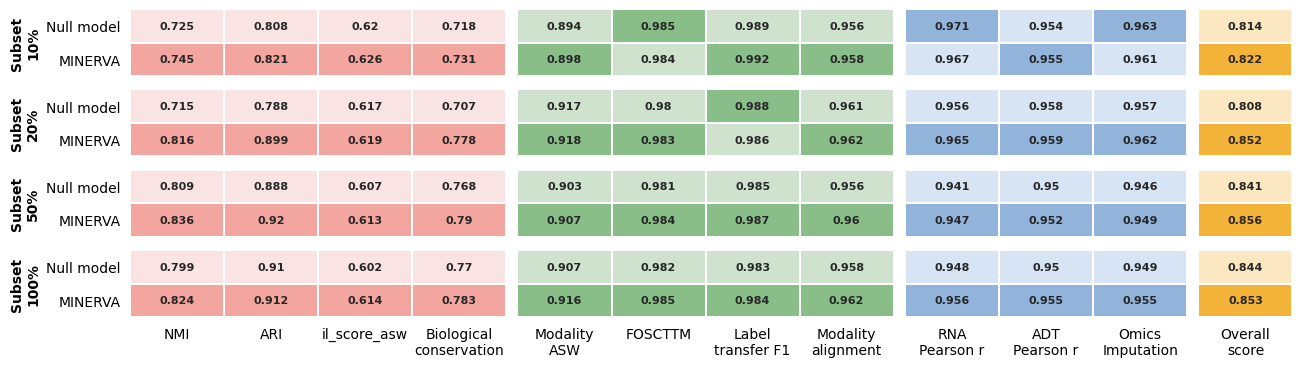

In [12]:
## 横向
fig, axes = plt.subplots(4, 4, sharey='row', gridspec_kw={'width_ratios':[4, 4, 3, 1] }, figsize=(15, 4))
plt.subplots_adjust(wspace = 0.04, hspace = 0.2)
# plt.rcParams['font.weight'] = 'bold'
for batch in list(range(0, len(list(name_dict.keys())))):
    for l, b in enumerate(batch_list):
        _data = data[(data['Subset Ratio'] == str(b))]
        _data = _data.drop(_data.columns[0], axis=1)
        if list(name_dict.keys())[batch] == "Biological\nconservation":
            __data = _data[['Model', 'NMI', 'ARI', 'il_score_asw', 'Biological\nconservation']]
        if list(name_dict.keys())[batch] == "Modality\nalignment":
            __data = _data[['Model', 'Modality\nASW', 'FOSCTTM', 'Label\ntransfer F1', 'Modality\nalignment']]
        if list(name_dict.keys())[batch] == "Omics\nImputation":
           __data = _data[['Model', 'RNA\nPearson r', 'ADT\nPearson r', 'Omics\nImputation']]
        if list(name_dict.keys())[batch] == "Overall\nscore":
           __data = _data[['Model', 'Overall\nscore']]
        __data = __data.set_index('Model')
        __data_ranked = __data.rank(axis = 0, ascending=False).astype(int)

        if l ==  len(list(name_dict.keys()))-1:
            xticklabels = True
        else:
            xticklabels = False
        
        # if l ==  0 :
        #     cbar = True
        #     cbar_kws = {'label': 'Ranked', 
        #                 'orientation': 'horizontal',
        #                 "ticks": np.arange(1, 7, 1),
        #                 "location": "top"}
        # else:
        #     cbar = False
        #     cbar_kws = {}

            
        axes[l, batch] = sns.heatmap(__data_ranked, annot = __data, ax = axes[l, batch], annot_kws = {"fontsize": 8, "fontweight": 'bold'}, fmt = '.3g', cmap = cmap_list[batch], 
                                     linewidths = 0.3, cbar = False, xticklabels = xticklabels)     
        
        if batch == 0:
            axes[l, batch].set_ylabel("Subset\n" + (batch_list[l]), fontsize = 10, rotation = 90, fontweight = 'bold')
        else:
            axes[l, batch].set_ylabel('')
        axes[l, batch].set_xlabel('')
        axes[l, batch].tick_params(labelsize = 10, axis = 'both', width = 0) 

# plt.tight_layout()
# plt.savefig('figure1.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

In [13]:
# ### 横向
# fig, axes = plt.subplots(4, 4, sharey='row', gridspec_kw={'width_ratios':[2.6, 2.4, 1.5, 3.6] }, figsize=(15, 4))
# plt.subplots_adjust(wspace = 0.04, hspace = 0.2)
# # plt.rcParams['font.weight'] = 'bold'
# for batch in list(range(0, len(list(name_dict.keys())))):
#     for l, b in enumerate(batch_list):
#         _data = data[(data['Subset Ratio'] == str(b))]
#         _data = _data.drop(_data.columns[0], axis=1)
#         if list(name_dict.keys())[batch] == "Biological\nconservation":
#             __data = _data[['Model', 'NMI', 'ARI', 'il_score_asw']]
#         if list(name_dict.keys())[batch] == "Modality\nalignment":
#             __data = _data[['Model', 'Modality\nASW', 'FOSCTTM', 'Label\ntransfer F1']]
#         if list(name_dict.keys())[batch] == "Omics\nImputation":
#            __data = _data[['Model', 'RNA\nPearson r', 'ADT\nPearson r']]
#         if list(name_dict.keys())[batch] == "Overall\nscore":
#            __data = _data[['Model', 'Biological\nconservation', 'Modality\nalignment', 'Omics\nImputation', 'Overall\nscore']]
#         __data = __data.set_index('Model')
#         __data_ranked = __data.rank(axis = 0, ascending=False).astype(int)

#         if l ==  len(list(name_dict.keys()))-1:
#             xticklabels = True
#         else:
#             xticklabels = False
        
#         # if l ==  0 :
#         #     cbar = True
#         #     cbar_kws = {'label': 'Ranked', 
#         #                 'orientation': 'horizontal',
#         #                 "ticks": np.arange(1, 7, 1),
#         #                 "location": "top"}
#         # else:
#         #     cbar = False
#         #     cbar_kws = {}

            
#         axes[l, batch] = sns.heatmap(__data_ranked, annot = __data, ax = axes[l, batch], annot_kws = {"fontsize": 8, "fontweight": 'bold'}, fmt = '.3g', cmap = cmap_list[batch], 
#                                      linewidths = 0.3, cbar = False, xticklabels = xticklabels)     
        
#         if batch == 0:
#             axes[l, batch].set_ylabel("Subset\n" + (batch_list[l]), fontsize = 10, rotation = 90, fontweight = 'bold')
#         else:
#             axes[l, batch].set_ylabel('')
#         axes[l, batch].set_xlabel('')
#         axes[l, batch].tick_params(labelsize = 10, axis = 'both', width = 0) 

# # plt.tight_layout()
# plt.savefig('figure1.svg', dpi = 300, bbox_inches = 'tight')
# plt.show()

In [14]:
# # 纵向
# fig, axes = plt.subplots(4, 4, sharey='row', gridspec_kw={'height_ratios':[4, 3, 2, 4], 'width_ratios':[1, 1, 1, 1.2] }, figsize=(20, 8))
# plt.rcParams['font.weight'] = 'bold'
# for batch in list(range(0, len(list(name_dict.keys())))):
#     for l, b in enumerate(batch_list):
#         _data = data[(data['Subset Ratio'] == str(b))]
#         _data = _data.drop(_data.columns[0], axis=1)
#         if list(name_dict.keys())[batch] == "Biological\nconservation":
#             __data = _data[['Model', 'NMI', 'ARI', 'il_score_asw', 'cLISI']]
#         if list(name_dict.keys())[batch] == "Modality\nalignment":
#             __data = _data[['Model', 'Modality\nASW', 'FOSCTTM', 'Label\ntransfer F1']]
#         if list(name_dict.keys())[batch] == "Omics\nImputation":
#            __data = _data[['Model', 'RNA\nPearson r', 'ADT\nPearson r']]
#         if list(name_dict.keys())[batch] == "Overall\nscore":
#            __data = _data[['Model', 'Biological\nconservation', 'Modality\nalignment', 'Omics\nImputation', 'Overall\nscore']]
#         __data = __data.set_index('Model').T
#         __data_ranked = __data.rank(axis=1, ascending=False).astype(int)

#         if l ==  len(list(name_dict.keys()))-1 :
#             cbar = True
#             cbar_kws = {"ticks":np.arange(1, 7, 1)}
#         else:
#             cbar = False
#             cbar_kws = {}

#         if batch == len(batch_list)-1:
#             xticklabels = True
#         else:
#             xticklabels = False
            
#         axes[batch, l] = sns.heatmap(__data_ranked, annot=__data, ax = axes[batch, l], fmt='.3g', cmap=cmap_list[batch], linewidths= 0.3, cbar = cbar,
#                                      cbar_kws = cbar_kws, xticklabels = xticklabels)

#         if l ==  len(list(name_dict.keys()))-1 :
#             if batch == 0:
#                 cbar_r = axes[batch, l].collections[0].colorbar
#                 cbar_r.set_label('Ranked', rotation = 0, y = 1.2, fontweight = "bold")        
        
#         if batch == 0:
#             axes[batch, l].set_title("Subset " + (batch_list[l]), fontsize = 12, y = 1.1, fontweight = "bold")
#             # if l == 0:
#             #     axes[batch, l].text(-1.5, -1.5, "Evaluate for the test set", fontsize = 20)
#             if l ==  len(list(name_dict.keys()))-1:
#                 axes[batch, l].set_label('')
#         axes[batch, l].set_xlabel('')
#         axes[batch, l].tick_params(axis = 'both', which = 'both', length = 0)
#         axes[batch, l].tick_params(labelsize = 10, axis='x', rotation = 45)  # fontweight = "bold"

# plt.tight_layout()
# plt.savefig('figure1.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)
